# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [8]:
import numpy as np

def apply_svd_custom(X_train, X_test, n_components):
    """
    Perform SVD on the training set, reduce its dimensions, and then apply the same
    transformation to the test set.

    Parameters:
    - X_train: Training data (2D array, shape: [n_samples, n_features])
    - X_test: Test data (2D array, shape: [n_samples, n_features])
    - n_components: Number of SVD components to retain

    Returns:
    - X_train_reduced: Reduced training data
    - X_test_reduced: Reduced test data
    """
    # Step 1: Compute SVD on X_train
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

    # Step 2: Select the top n_components singular values and corresponding vectors
    # Use the first 'n_components' columns of U, first 'n_components' rows of Vt, and singular values from S
    Vt_reduced = Vt[:n_components, :]  # Reduced right singular vectors (components)

    # Step 3: Project the training data into the reduced-dimensional space
    X_train_reduced = np.dot(X_train, Vt_reduced.T)  # Project training data

    # Step 4: Project the test data into the same space as X_train_reduced
    X_test_reduced = np.dot(X_test, Vt_reduced.T)    # Project test data

    return X_train_reduced, X_test_reduced


## Part 3: Train Logistic Regression and Measure Performance

In [9]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [10]:
svd_components = [784, 500, 200, 100, 50, 20]  # number of singular values
#svd decomposes the dataset (matrix) into three matrices:
# A matrix of left singular vectors, which are orthogonal and capture patterns in the data
#A diagonal matrix of singular values, which represent the importance (or variance) of each corresponding singular vector
# A matrix of right singular vectors, which capture the features in the data
# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)



    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 877.8802 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 528.5546 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 152.6957 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 61.6062 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 17.0658 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 1.5642 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


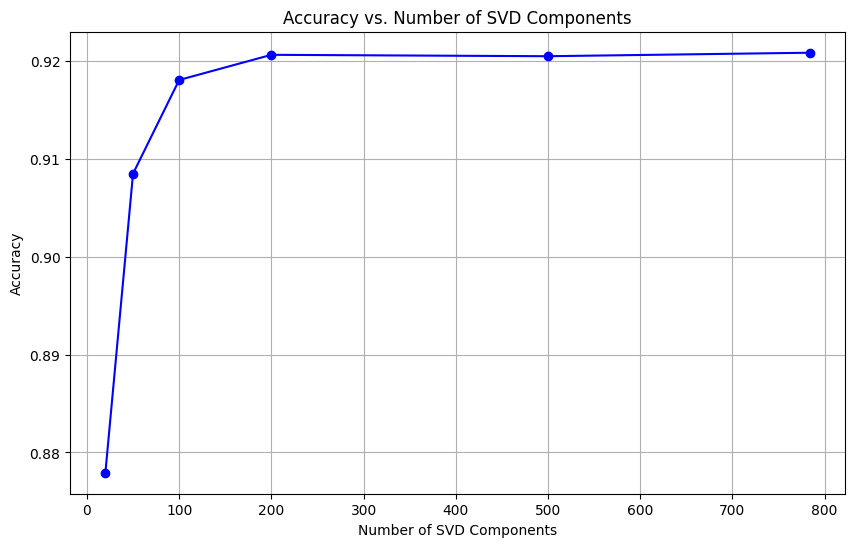

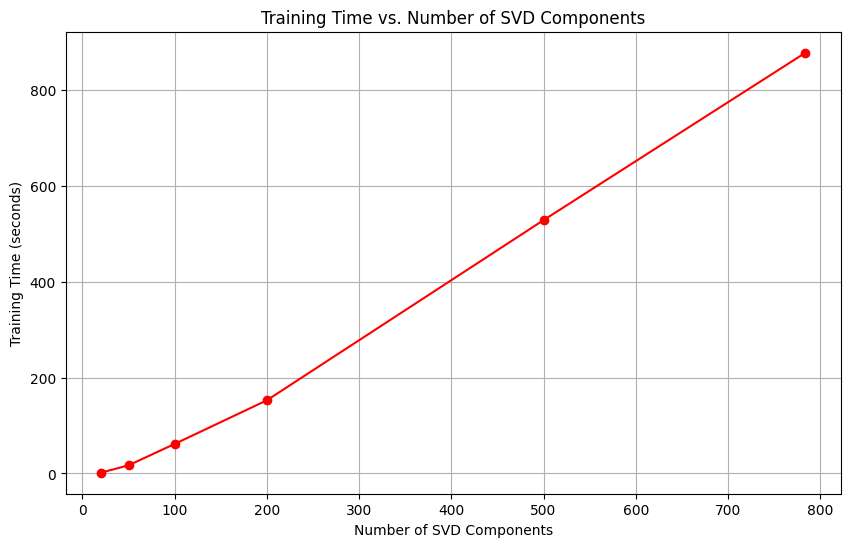

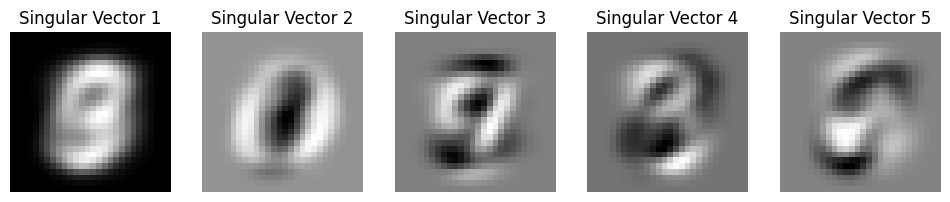

In [11]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' is already populated with {'n_components', 'accuracy', 'training_time'}

# Extract values from results
components = [res['n_components'] for res in results]
accuracies = [res['accuracy'] for res in results]
training_times = [res['training_time'] for res in results]

# Plot 1: Accuracy vs. Number of SVD Components
plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Plot 2: Training Time vs. Number of SVD Components
plt.figure(figsize=(10, 6))
plt.plot(components, training_times, marker='o', linestyle='-', color='r')
plt.title("Training Time vs. Number of SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time (seconds)")
plt.grid(True)
plt.show()

# Plot 3: Visualize Top 5 Singular Vectors as 28x28 Images

def plot_singular_vectors(Vt, num_vectors=5):
    """Visualizes the top singular vectors reshaped as 28x28 images."""
    plt.figure(figsize=(12, 6))

    for i in range(num_vectors):
        singular_vector = Vt[i, :].reshape(28, 28)  # Reshape to 28x28 for visualization
        plt.subplot(1, num_vectors, i+1)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f"Singular Vector {i+1}")
        plt.axis('off')

    plt.show()

# Assuming the top 5 singular vectors are part of Vt from your SVD on the full dataset
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)  # You can adjust this based on your SVD function
plot_singular_vectors(Vt)



## Part 6: Analyze / Conclusion

YOUR ANSWER:

General Overview of SVD and how it's used in this assignment (for me):

The MNIST data set is a data set consisting of 70,000 grayscale images of handwritten digits (from 0 to 9). Each digit is a 1D array of 784 pixels. My code aimed to implement SVD, a dimensionality reduction algorithm, on the data set, and then train a logistic regression model on the data received. SVD aims to reduce the number of features (784) as much as possible while still retaining important details given by the dataset. With SVD we are decomposing the matrix of all the digits provided by MNIST into 3 matrices. In doing so we are finding all the singular vectors that describe the MNIST dataset. These vectors are the columns of the V transposed matrix. Our goal is to keep only the first n_components as singular vectors, thus reducing the dimensionality of the data. The top n singular values are the most important patterns/variances in the data, and thus should be retained. We try different numbers of components. This makes training of our model faster.

Analysis of Results:

We have three plots to analyse. The first plot describes the accuracy of the logistic regression model as we change the number of components. We can see that as the number of components increases there is a sharp increase from 50 to 200, but after 200 the accuracy of the model stabilizes around 0.93. This matches what we'd expect after SVD is applied to the data. That is, as the number of components, or information retained by the model about the data, increases the accuracy will increase. At around 200 components there is enough variance in the data captured by SVD. Therefore we can conclude that beyond 200 components we capture redudant information which doesn't help the model discern what the image is. Thus at around 200 components, SVD allows us to retain the most important information.

The second plot describes the training time of the model against the number of components. We can see an almost linear relationship between the two, that is as we use more components to train, the training time increases. This makes sense, since as we increase the number of components the complexity of the data set/ number of singular vectors increases. Thus there is more data/dimensionality to process by the model and the training time is longer. The goal of SVD is to reduce the training time without losing accuracy.

Finally, we analyse what the SVD reduced. We see 5 singular vectors. These vectors are carrying the most general features of all digits, hence why they are blurry- they are representing patterns that are common for all the 10 digits. So the lower components correspond to higher reductions in details. The first few singular vectors (e.g., Singular Vector 1) carry the most general and critical features of the dataset, explaining the broad patterns that are common to many digits. Thus when we get to singular vector 5 it is undiscernible which digits it could correspond to, as it is capturing only very specific details.





